In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-airbnb-2023-public-data/NYC-Airbnb-2023.csv


In [2]:
airbnb=pd.read_csv("/kaggle/input/new-york-city-airbnb-2023-public-data/NYC-Airbnb-2023.csv")
airbnb

/tmp/ipykernel_21/3265370921.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb=pd.read_csv("/kaggle/input/new-york-city-airbnb-2023-public-data/NYC-Airbnb-2023.csv")


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.753560,-73.985590,Entire home/apt,150,30,49,2022-06-21,0.30,3,314,1,NaN
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.685350,-73.955120,Private room,60,30,50,2019-12-02,0.30,2,365,0,NaN
2,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.803800,-73.967510,Private room,75,2,118,2017-07-21,0.72,1,0,0,NaN
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.764570,-73.983170,Private room,68,2,575,2023-02-19,3.41,1,106,52,NaN
4,5136,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.662650,-73.994540,Entire home/apt,275,60,3,2022-08-10,0.03,1,181,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42926,839753193689829909,bright studio in Williamsburg,28057253,Jean,Brooklyn,Williamsburg,40.718976,-73.963985,Entire home/apt,76,7,0,NaN,NaN,1,8,0,NaN
42927,839786573617495393,Room in the heart of LES with Gym& Rooftop BBQ,247439246,Charlene,Manhattan,East Village,40.721703,-73.981473,Private room,32,30,0,NaN,NaN,5,79,0,NaN
42928,839797749155954018,Fantastic 3BD apt in Brooklyn,26349246,Jose,Brooklyn,Bushwick,40.688700,-73.907650,Entire home/apt,127,3,0,NaN,NaN,8,356,0,NaN
42929,839814083143454171,The Coziest Home,48533809,Remmy,Staten Island,Bull's Head,40.616911,-74.164652,Entire home/apt,280,1,0,NaN,NaN,1,87,0,NaN


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: >

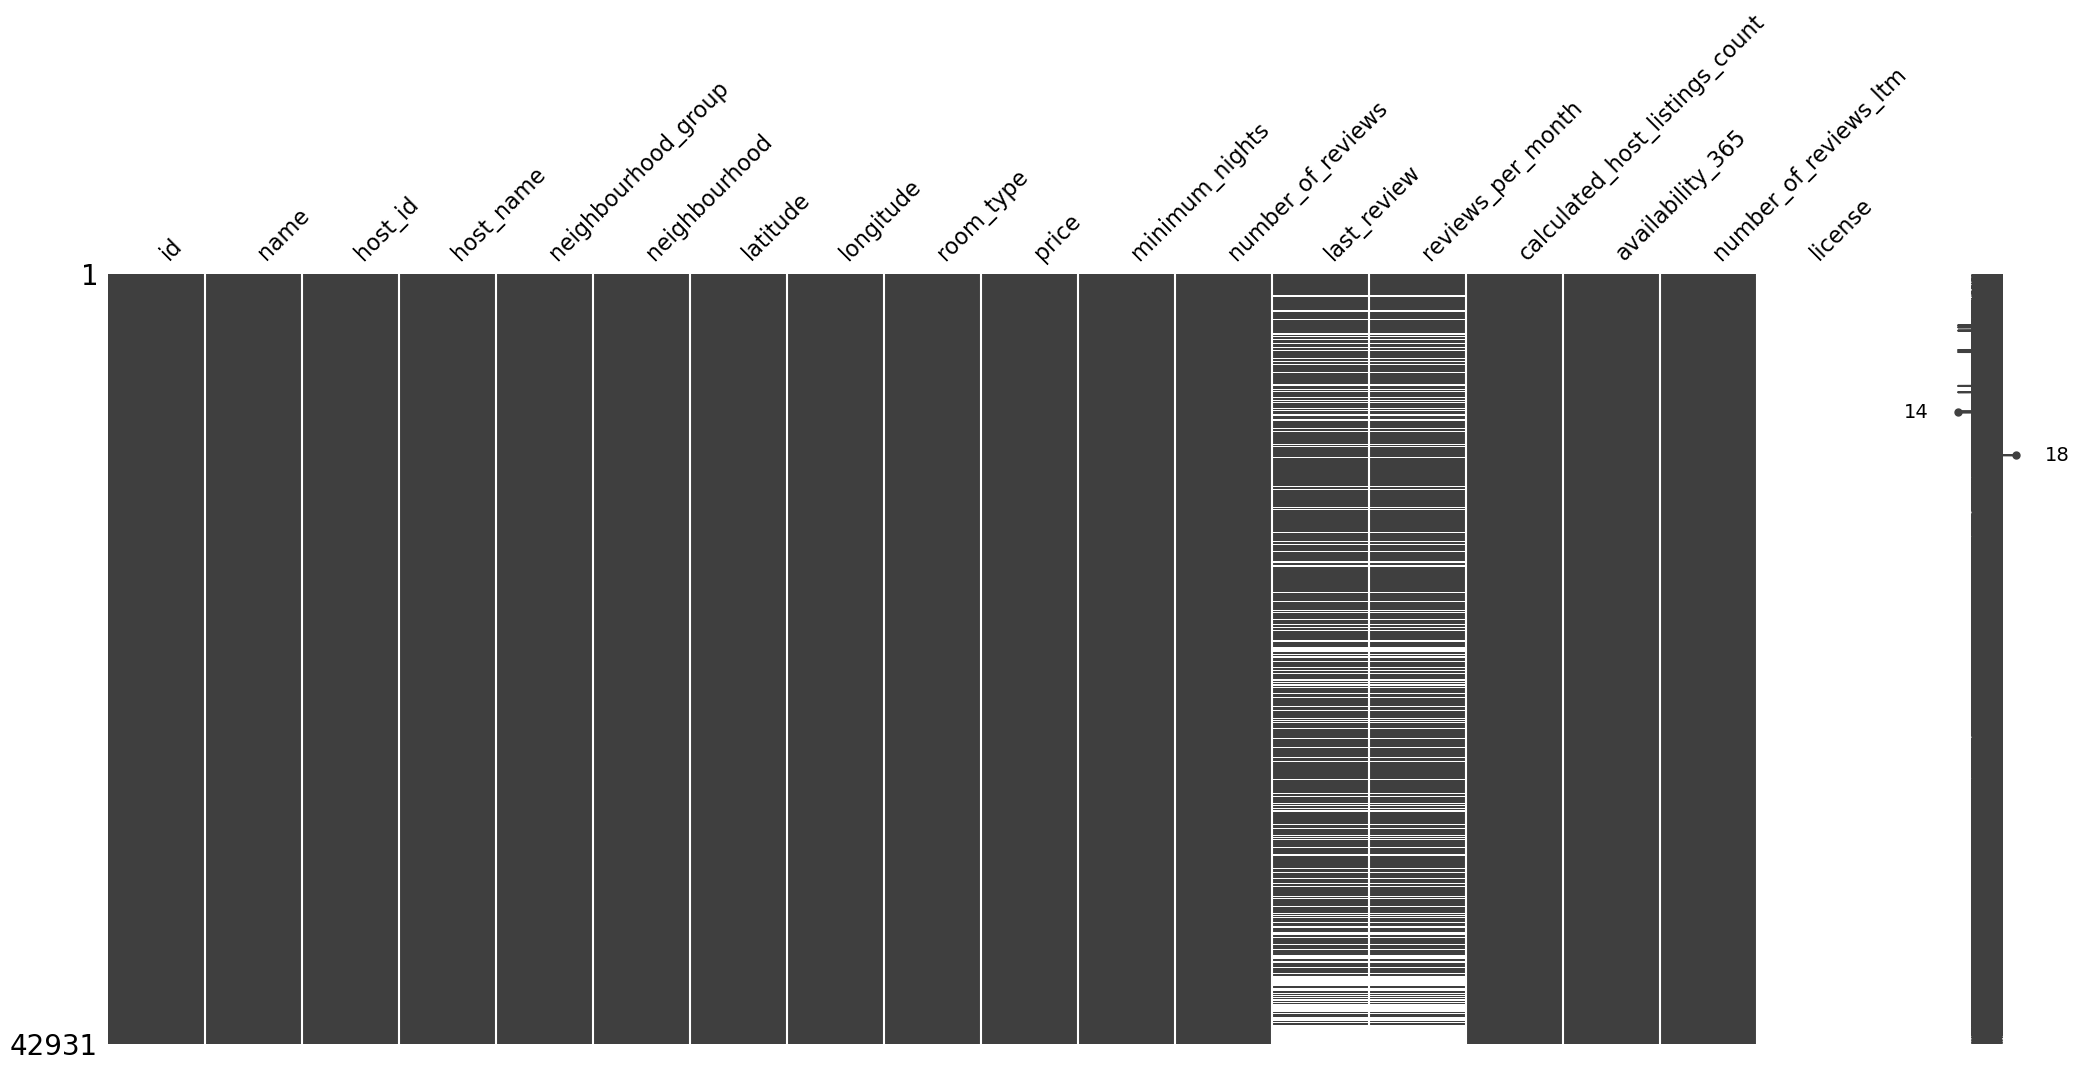

In [3]:
import missingno as msno
msno.matrix(airbnb)

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Display the first few rows of the dataset
print(airbnb.head())

# Check the summary statistics of numerical columns
print(airbnb.describe())

# Check the data types and missing values
print(airbnb.info())


     id                                         name  host_id  host_name  \
0  2595                        Skylit Midtown Castle     2845   Jennifer   
1  5121                              BlissArtsSpace!     7356      Garon   
2  5203           Cozy Clean Guest Room - Family Apt     7490  MaryEllen   
3  5178             Large Furnished Room Near B'way　     8967   Shunichi   
4  5136  Large Sunny Brooklyn Duplex, Patio + Garden     7378    Rebecca   

  neighbourhood_group       neighbourhood  latitude  longitude  \
0           Manhattan             Midtown  40.75356  -73.98559   
1            Brooklyn  Bedford-Stuyvesant  40.68535  -73.95512   
2           Manhattan     Upper West Side  40.80380  -73.96751   
3           Manhattan             Midtown  40.76457  -73.98317   
4            Brooklyn         Sunset Park  40.66265  -73.99454   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt    150              30                 49  2022-06-

## **Data Cleaning**

In [5]:
# Check and handle missing values
print(airbnb.isnull().sum())

# Convert 'last_review' column to datetime type
airbnb['last_review'] = pd.to_datetime(airbnb['last_review'])


id                                    0
name                                 12
host_id                               0
host_name                             5
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10304
reviews_per_month                 10304
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           42930
dtype: int64


## **Visualize Data**

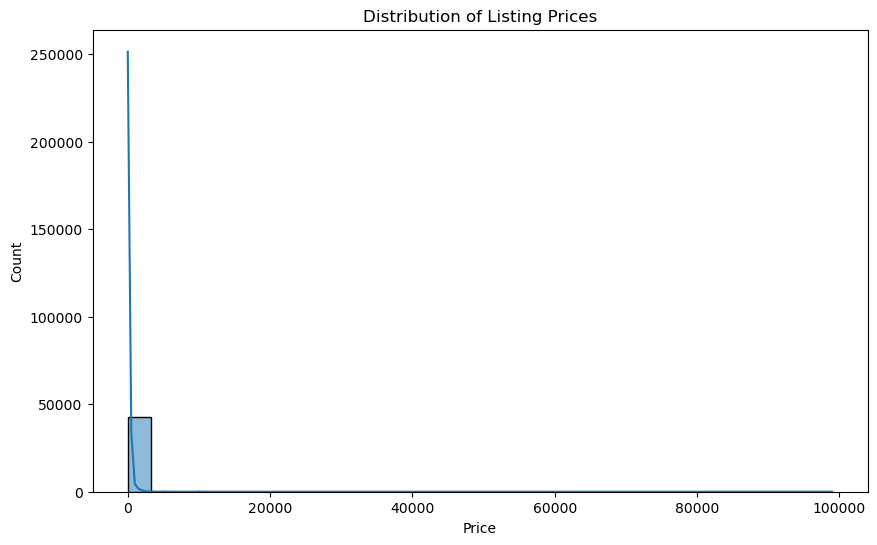

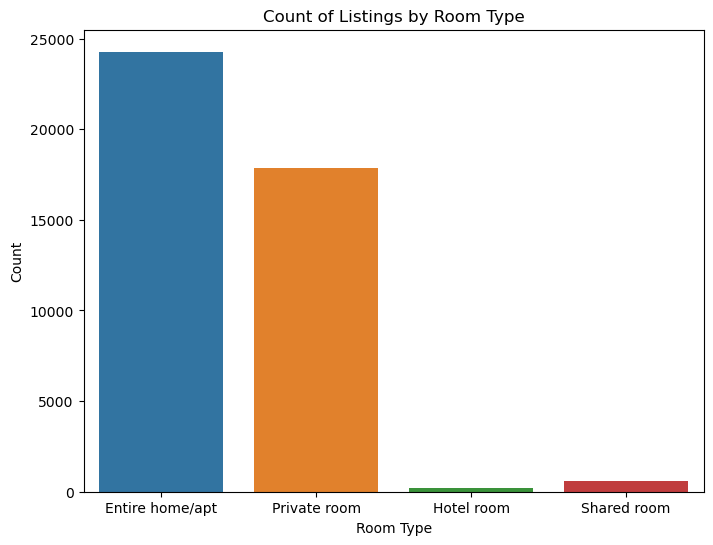

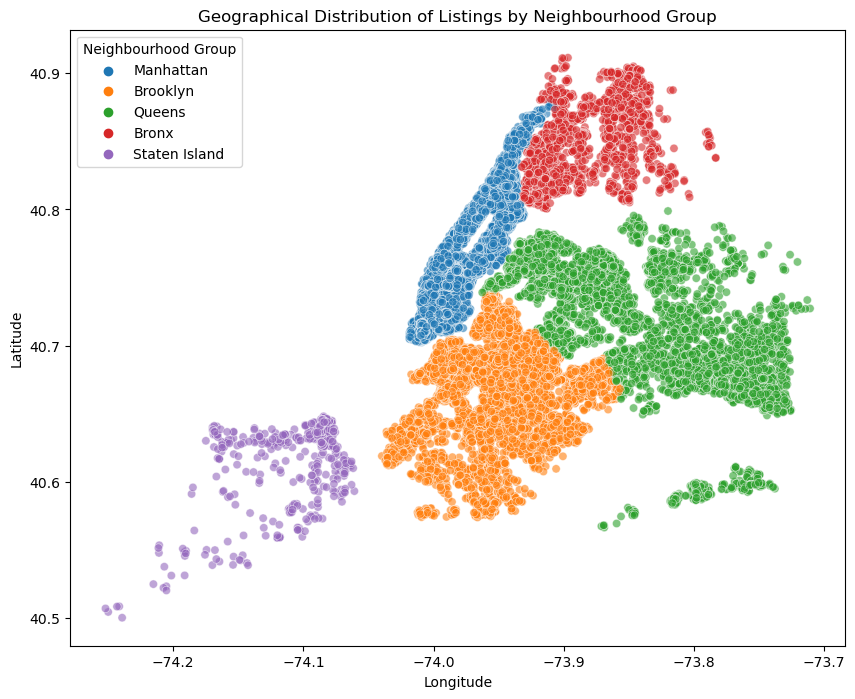

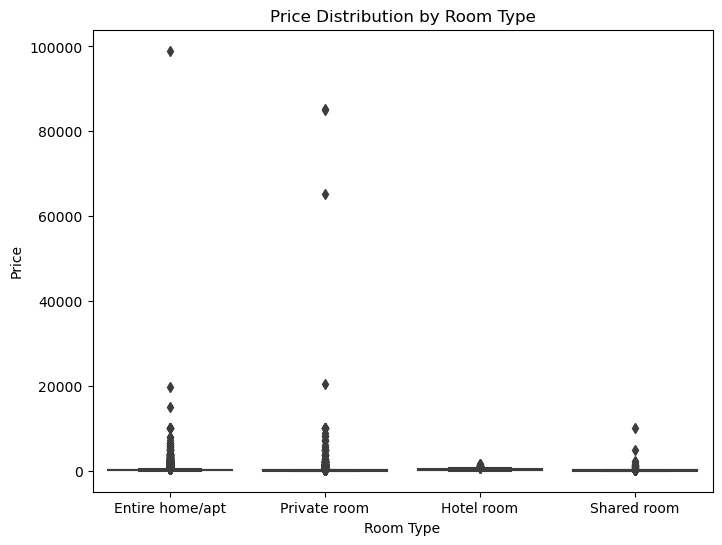

In [6]:
# Histogram of prices
plt.figure(figsize=(10, 6))
sns.histplot(data=airbnb, x='price', bins=30, kde=True)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Listing Prices')
plt.show()

# Count plot of room types
plt.figure(figsize=(8, 6))
sns.countplot(data=airbnb, x='room_type')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Count of Listings by Room Type')
plt.show()

# Scatter plot of latitude and longitude colored by neighborhood_group
plt.figure(figsize=(10, 8))
sns.scatterplot(data=airbnb, x='longitude', y='latitude', hue='neighbourhood_group', alpha=0.6)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Listings by Neighbourhood Group')
plt.legend(title='Neighbourhood Group')
plt.show()

# Box plot of prices by room type
plt.figure(figsize=(8, 6))
sns.boxplot(data=airbnb, x='room_type', y='price')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.title('Price Distribution by Room Type')
plt.show()


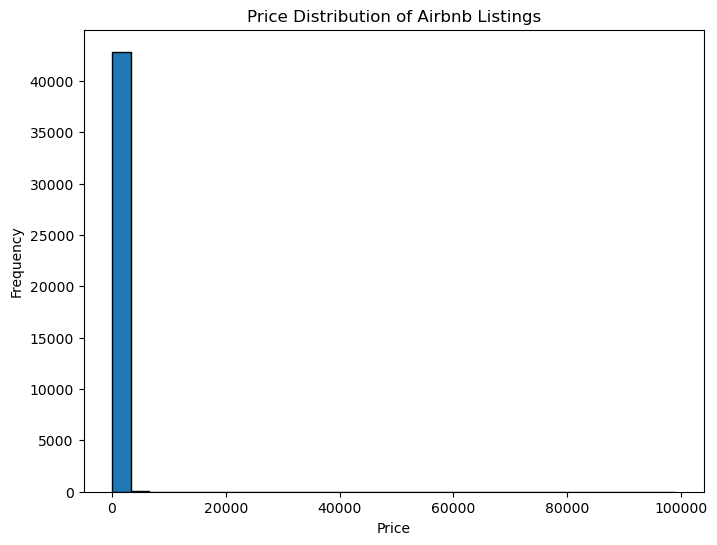

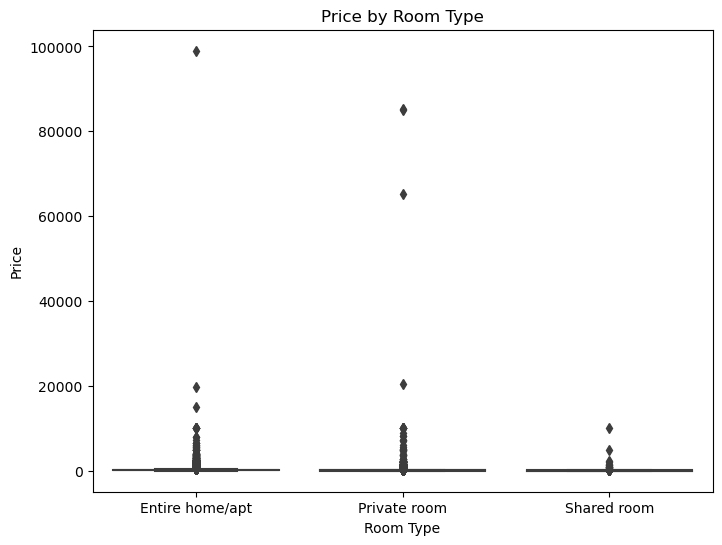

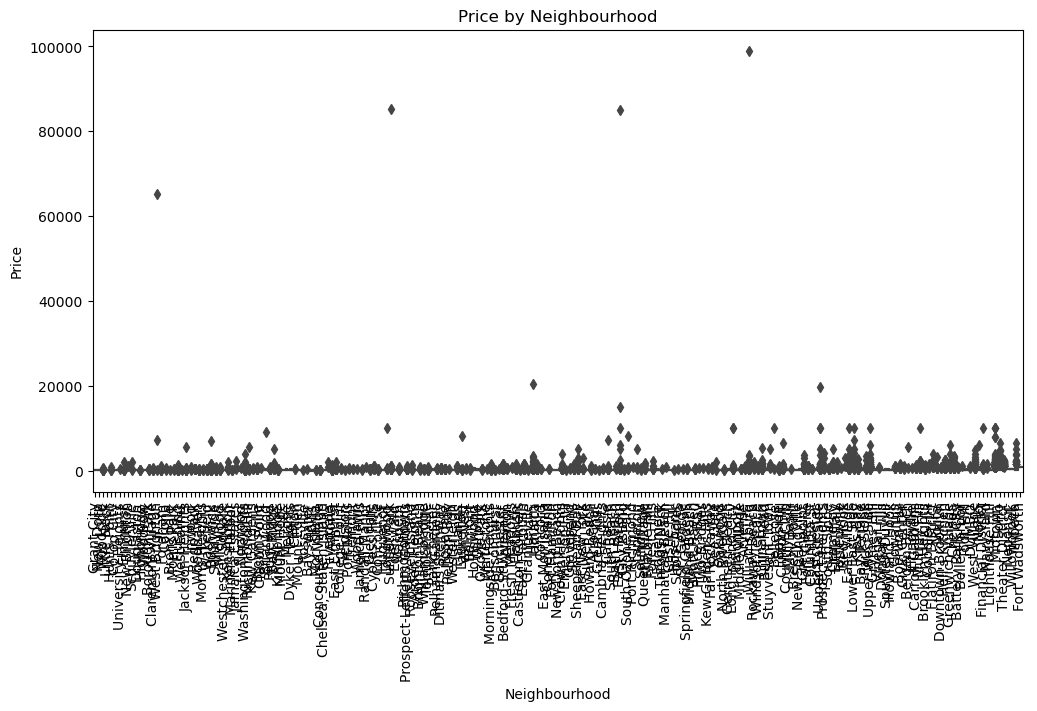

In [7]:
# Price Distribution - Histogram
plt.figure(figsize=(8, 6))
plt.hist(airbnb['price'], bins=30, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution of Airbnb Listings')
plt.show()

# Price by Room Type - Box Plot
plt.figure(figsize=(8, 6))
room_order = ['Entire home/apt', 'Private room', 'Shared room']
sns.boxplot(x='room_type', y='price', data=airbnb, order=room_order)
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.title('Price by Room Type')
plt.show()

# Price by Neighbourhood - Box Plot
plt.figure(figsize=(12, 6))
neighborhood_order = airbnb.groupby('neighbourhood')['price'].median().sort_values().index
sns.boxplot(x='neighbourhood', y='price', data=airbnb, order=neighborhood_order)
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.title('Price by Neighbourhood')
plt.xticks(rotation=90)
plt.show()

/tmp/ipykernel_21/1638044518.py:6: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb = pd.read_csv("/kaggle/input/new-york-city-airbnb-2023-public-data/NYC-Airbnb-2023.csv")


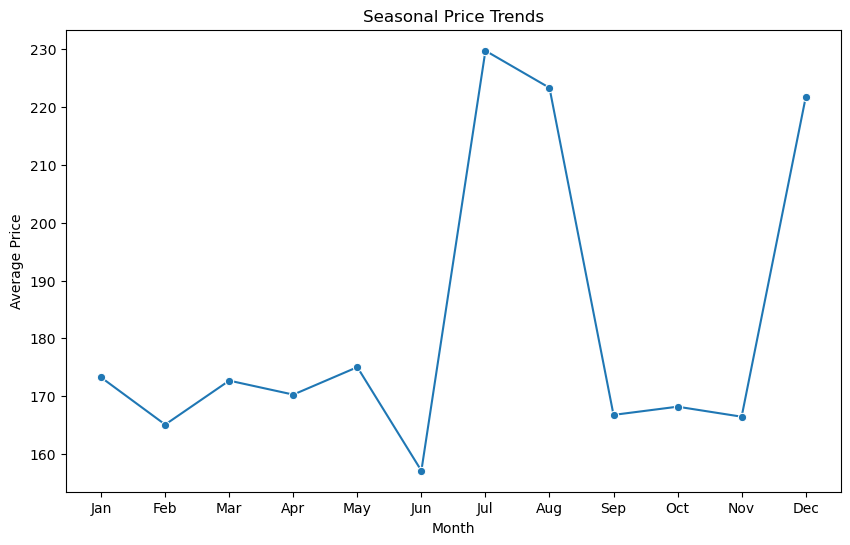

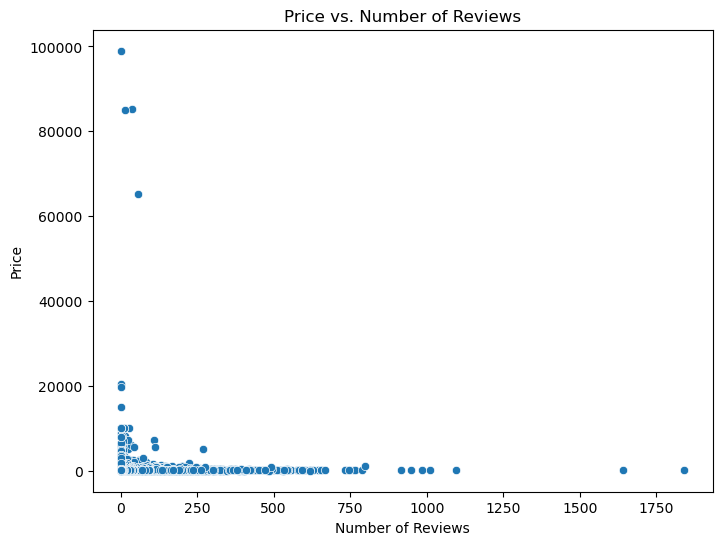

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
airbnb = pd.read_csv("/kaggle/input/new-york-city-airbnb-2023-public-data/NYC-Airbnb-2023.csv")

# Convert 'last_review' column to datetime
airbnb['last_review'] = pd.to_datetime(airbnb['last_review'])

# Seasonal Price Trends - Line Plot
plt.figure(figsize=(10, 6))
airbnb['month'] = airbnb['last_review'].dt.month
monthly_avg_prices = airbnb.groupby('month')['price'].mean()
sns.lineplot(x=monthly_avg_prices.index, y=monthly_avg_prices.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Seasonal Price Trends')
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Price vs. Reviews and Ratings - Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='number_of_reviews', y='price', data=airbnb)
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.title('Price vs. Number of Reviews')
plt.show()




/tmp/ipykernel_21/2895549329.py:7: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb = pd.read_csv("/kaggle/input/new-york-city-airbnb-2023-public-data/NYC-Airbnb-2023.csv")


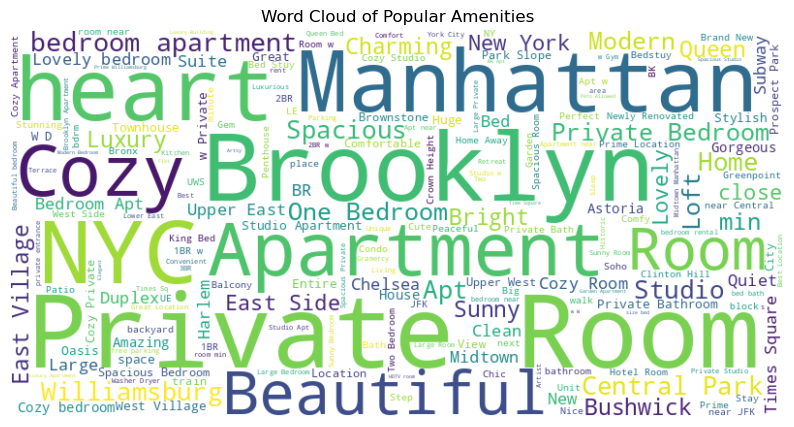

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the dataset
airbnb = pd.read_csv("/kaggle/input/new-york-city-airbnb-2023-public-data/NYC-Airbnb-2023.csv")

# Remove rows with missing 'name' values
airbnb = airbnb.dropna(subset=['name'])

# Popular Amenities - Word Cloud
amenities_text = " ".join(airbnb['name'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(amenities_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Popular Amenities')
plt.show()



/tmp/ipykernel_21/2727894519.py:7: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb = pd.read_csv("/kaggle/input/new-york-city-airbnb-2023-public-data/NYC-Airbnb-2023.csv")


[  3   2   1   4   5  30   9   6   7  10  12   8  17  15  19  29 159  38
  28  31  62  57  51 207  33  14 131 124  11 113  16  23  83 526 394 192
 178  76  18  13  63  36  24  54  48 222  88 101  27  47  25  32  59  53
  21  22  44  20  35  41  39 120 107  69 356]
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license              

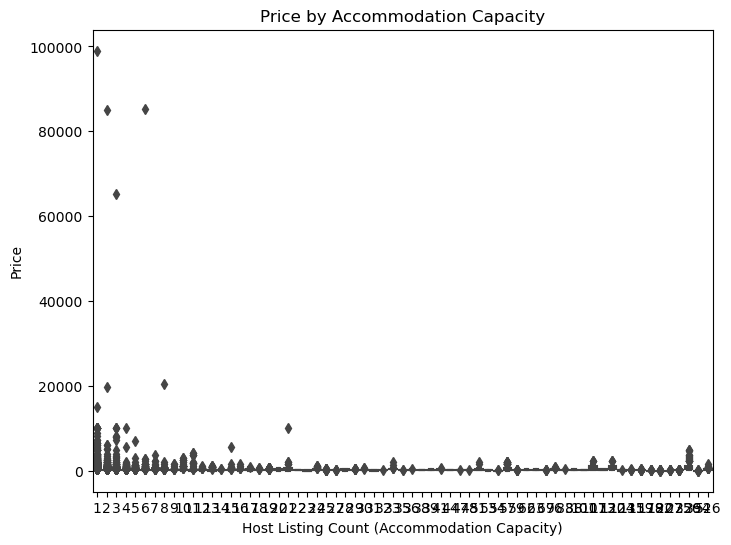

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the dataset
airbnb = pd.read_csv("/kaggle/input/new-york-city-airbnb-2023-public-data/NYC-Airbnb-2023.csv")

# Remove rows with missing 'name' values
airbnb = airbnb.dropna(subset=['name'])

# Check unique values in 'calculated_host_listings_count' column
print(airbnb['calculated_host_listings_count'].unique())

# Check data types of all columns
print(airbnb.dtypes)

# Price by Accommodation Capacity - Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='calculated_host_listings_count', y='price', data=airbnb)
plt.xlabel('Host Listing Count (Accommodation Capacity)')
plt.ylabel('Price')
plt.title('Price by Accommodation Capacity')
plt.show()
